A notebook to segment and quantify single cells from volumes extracted around mastodon tracks

In [ ]:
import tifffile as tiff
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
import os, shutil
import glob
import numpy as np
from pathlib import Path


## Cellpose Segmentation


In [2]:
# activate cellpose-env
# to use GPU, first check on the terminal: 
!nvcc --version 
!nvidia-smi
# then turn use GPU to True

from cellpose import core, utils, io, models, metrics, plot
from cellpose.io import imread
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:30:10_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0
Sat Feb 15 20:06:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Quadro RTX 5000              WDDM  |   00000000:D8:00.0 Off |                  Off |
| 33%

c:\Users\fronte\.conda\envs\cellpose\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>>> GPU activated? YES


#### Run in a single image file

In [15]:
io.logger_setup()

# LATER FOR RUNNING THE WHOLE FOLDER!!!!

### MODEl
#  Custom model path
# model_path = "H:/PROJECTS-03/Feyza/segmentation/cellpose_nuclei_membrane/training_data_05z/models/CP_20241007_h2bxncad"

# model = models.CellposeModel(gpu=True, 
#							 pretrained_model=model_path)

# or to run one of the other models, or a custom model, specify a CellposeModel
model = models.CellposeModel(model_type='cyto3')

### Path to images
imgs_path = "E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/Cell_0_T_006_merged.tif"
imgs = imread(imgs_path)
nimg = len(imgs)
print(f'Loaded image in an array of shape: {imgs.shape} and data type {imgs.dtype}')

### PARAMETERS
# define channels
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [[1,2]] #membrane
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

channels = [[3,3]] #only nucleus
#save file name as
files = os.path.dirname(imgs_path) + "/" + "3d_segmentation_test_cp_masks_raw_cyto3"
			 


# Segmentation Parameters
#diameter = 25 # in pixels for membrane
diameter = 17 # pixels for nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images
cellprob_threshold = -1

masks, flows, styles = model.eval(imgs, diameter=diameter, channels=channels, 
										cellprob_threshold=cellprob_threshold, 
										do_3D=True, anisotropy=1.5, min_size=1000)

#if stitch_threshold>0.0 and not do_3D, masks are stitched in 3D to return volume segmentation



# save output to *_seg.npy
io.masks_flows_to_seg(imgs, 
					  masks, 
					  flows, 
					  files, 
					  channels=channels) 



#save output masks to tiffs/pngs or txt files for imageJ
io.save_masks(imgs, 
			  masks,
			  flows, 
			  files, 
			  channels=channels,
			  png=True, # save masks as PNGs and save example image
			  tif=True, # save masks as TIFFs
			  save_txt=True, # save txt outlines for ImageJ
			  save_flows=False, # save flows as TIFFs
			  save_outlines=False, # save outlines as TIFFs 
			  save_mpl=True # make matplotlib fig to view (WARNING: SLOW W/ LARGE IMAGES)
			  )



creating new log file
2025-01-27 10:51:29,131 [INFO] WRITING LOG OUTPUT TO C:\Users\fronte\.cellpose\run.log
2025-01-27 10:51:29,132 [INFO] 
cellpose version: 	3.0.10 
platform:       	win32 
python version: 	3.9.19 
torch version:  	1.8.2
2025-01-27 10:51:29,135 [INFO] >> cyto3 << model set to be used
2025-01-27 10:51:29,137 [INFO] >>>> using CPU


2025-01-27 10:51:29,220 [INFO] >>>> loading model C:\Users\fronte\.cellpose\models\cyto3
2025-01-27 10:51:29,366 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-01-27 10:51:29,385 [INFO] reading tiff with 36 planes


100%|██████████| 36/36 [00:00<00:00, 1285.73it/s]

Loaded image in an array of shape: (12, 3, 50, 50) and data type uint16
2025-01-27 10:51:29,421 [INFO] multi-stack tiff read in as having 12 planes 3 channels
2025-01-27 10:51:29,426 [INFO] running YX: 12 planes of size (50, 50)
2025-01-27 10:51:29,429 [INFO] 0%|          | 0/1 [00:00<?, ?it/s]


2025-01-27 10:51:31,505 [INFO] 100%|##########| 1/1 [00:02<00:00,  2.07s/it]
2025-01-27 10:51:31,513 [INFO] running ZY: 50 planes of size (12, 50)
2025-01-27 10:51:33,394 [INFO] 100%|##########| 2/2 [00:01<00:00,  1.07it/s]
2025-01-27 10:51:33,403 [INFO] running ZX: 50 planes of size (12, 50)
2025-01-27 10:51:35,260 [INFO] 100%|##########| 2/2 [00:01<00:00,  1.08it/s]
2025-01-27 10:51:35,268 [INFO] network run in 5.85s
2025-01-27 10:51:35,421 [INFO] masks created in 0.15s


#### Run in a folder of images to denoise+segment

In [6]:
# CHANGE MODEL_PATH, CHANNELS AND DIAMETER AS REQUIRED
# ADD INPUT FOLDER WHERE CROPPED TRACK IMAGES ARE

# Setup logging for Cellpose
io.logger_setup()

### MODEL
# Custom model path
# model_path = "H:/PROJECTS-03/Feyza/segmentation/cellpose_nuclei_membrane/training_data_05z/models/CP_20241007_h2bxncad" #membrane (w nucleus)
model_path = "H:/PROJECTS-03/Agnese/cellpose training/2d/models/nuclei_h2b" #nucleus

model = models.CellposeModel(gpu=True, pretrained_model=model_path)
### PARAMETERS
# Define channels
# channels = [[1, 2]]  # cytoplasm: 1, nucleus: 2
channels = [[3,0]] # only nucleus: if multi-channel image 3=nucleus is the third channel in the image. If there is only the nucleus (gray scale) is [0,0]

# Segmentation parameters
# diameter = 25  # in pixels for membrane
diameter = 17 # in pixels for nucleus
cellprob_threshold = -1

# Input folder containing images
input_folder = Path("E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3")
output_folder = input_folder / "denoised_segmentation_masks"
output_folder.mkdir(exist_ok=True)  # Create folder if it doesn't exist

# Process all files in the folder
for img_file in input_folder.glob("*.tif"):
    print(f"Processing file: {img_file.name}")

    # Read image
    imgs = imread(img_file)
    print(f'Loaded image {img_file.name} with shape: {imgs.shape} and data type {imgs.dtype}')

    # Generate output file name
    output_file_base = output_folder / img_file.stem  # Use the base name without extension

    # USE cellposeDenoiseModel FOR DENOISING THE IMAGE
    from cellpose import denoise
    dn = denoise.DenoiseModel (model_type='denoise_cyto3', gpu=True, chan2=True)
    imgs = dn.eval(imgs, channels=[3,0], diameter=17.)

    # Perform segmentation
    masks, flows, styles = model.eval(
        imgs,
        diameter=diameter,
        channels=channels,
        cellprob_threshold=cellprob_threshold,
        do_3D=True,
        anisotropy=1.5,
        min_size=-1,
    )

    # Save output to *_seg.npy
    seg_file = str(output_file_base) + "_seg"
    io.masks_flows_to_seg(imgs, masks, flows, seg_file, channels=channels)

    # Save output masks to tiffs/pngs or txt files for ImageJ
    io.save_masks(
        imgs,
        masks,
        flows,
        str(output_file_base),
        channels=channels,
        png=False,  # Save masks as PNGs
        tif=True,  # Save masks as TIFFs
        save_txt=True,  # Save txt outlines for ImageJ
        save_flows=False,  # Save flows as TIFFs
        save_outlines=False,  # Save outlines as TIFFs
        save_mpl=False,  # Make matplotlib fig to view (WARNING: SLOW W/ LARGE IMAGES)
    )

    print(f"Saved results for {img_file.name} to {output_folder}")

print("All files processed.")


2025-02-15 20:13:24,276 [INFO] WRITING LOG OUTPUT TO C:\Users\fronte\.cellpose\run.log
2025-02-15 20:13:24,278 [INFO] 
cellpose version: 	3.0.10 
platform:       	win32 
python version: 	3.9.19 
torch version:  	1.8.2


2025-02-15 20:13:24,313 [INFO] ** TORCH CUDA version installed and working. **
2025-02-15 20:13:24,315 [INFO] >>>> using GPU
2025-02-15 20:13:24,485 [INFO] >>>> loading model H:/PROJECTS-03/Agnese/cellpose training/2d/models/nuclei_h2b
2025-02-15 20:13:24,787 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-02-15 20:13:24,789 [INFO] >>>> model diam_labels =  14.500 (mean diameter of training ROIs)
Processing file: Cell_0_T_050_merged.tif
Loaded image Cell_0_T_050_merged.tif with shape: (12, 50, 50, 3) and data type uint16
2025-02-15 20:13:24,851 [INFO] >> denoise_cyto3 << model set to be used
2025-02-15 20:13:24,854 [INFO] ** TORCH CUDA version installed and working. **
2025-02-15 20:13:24,855 [INFO] >>>> using GPU
2025-02-15 20:13:25,217 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
loading model for chan2: denoise_nuclei
2025-02-15 20:13:25,587 [INFO] multi-stack tiff read in as having 12 planes 3 channels
20

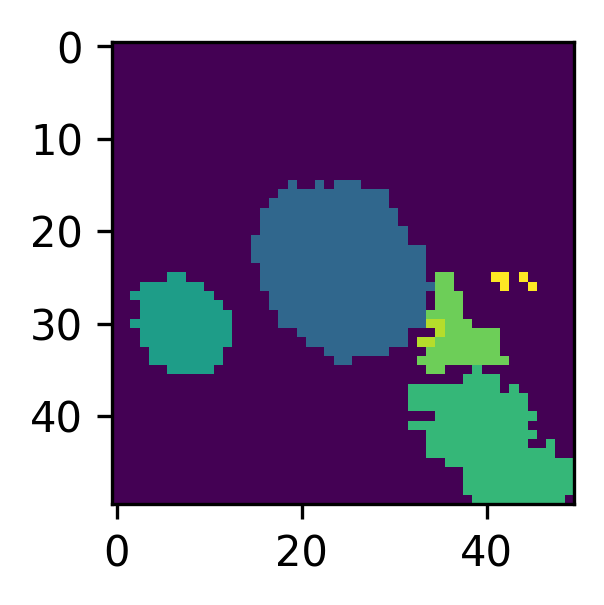

In [8]:
# sneak peek 
masks = imread("E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/denoised_segmentation_masks/Cell_0_T_100_merged_cp_masks.tif")
plt.figure(figsize=(2, 2))
plt.imshow(masks[6]) #the number means the z plane you want to print

## Isolating the central mask from segmented volumes

In [9]:
# function using fill holes and remove small masks util from cellpose, then picking the segment in the center of the volume and saving binarized images

# could add remove edge masks to this in the future, after making sure volumes are big enough to keep center mask away from edges

import glob

def isolate_center_mask(volume, min_size=100):
    """
    Process a 3D TIFF image of masks:
    - Fill holes and remove small masks.
    - Identify the mask at the center of the center slice.
    - Keep only that mask in the volume.
    - Binarize the resulting image.
    - Save the processed image.

    Parameters:
        min_size (int): Minimum size of masks to retain during processing.
    """
    
    # Apply pre-processing: fill holes and remove small masks
    volume = utils.fill_holes_and_remove_small_masks(volume, min_size=min_size)
    
    # Extract the center label
    center_slice_idx = volume.shape[0] // 2
    center_slice = volume[center_slice_idx]
    center_y, center_x = center_slice.shape[0] // 2, center_slice.shape[1] // 2
    central_mask_label = center_slice[center_y, center_x]
    
    # Check if the center pixel is part of a mask
    if central_mask_label == 0:
        raise ValueError("The center of the center slice does not contain a mask.")
    
    # Create a binary mask for the entire volume
    binary_volume = (volume == central_mask_label).astype(np.uint8)

    return binary_volume


def isolate_center_mask_in_folder(input_path, min_size=100):
    """
    Process all 3D TIFF mask files in a folder, isolating the central mask for each,
    and save the processed binary images to a new output folder.

    Parameters:
        input_path (str): Path to the folder containing mask files ending with "_masks".
        min_size (int): Minimum size of masks to retain during processing.
    """
    
    # Find all files ending with "_masks"
    mask_files = glob.glob(os.path.join(input_path, "*_masks.tif"))
    if not mask_files:
        raise ValueError("No mask files ending with '_masks.tif' were found in the input folder.")
    
    # Create an output folder in the parent directory
    parent_dir = os.path.dirname(input_path)
    output_folder = os.path.join(parent_dir, "center_masks")
    os.makedirs(output_folder, exist_ok=True)
    
    # Process each mask file
    for mask_file in mask_files:
        print(f"Processing {mask_file}...")
        # Load the mask volume
        volume = tiff.imread(mask_file)
        
        # Process the volume
        try:
            binary_volume = isolate_center_mask(volume, min_size=min_size)
        except ValueError as e:
            print(f"Skipping {mask_file} due to error: {e}")
            continue
        
        # Save the processed binary volume
        base_name = os.path.basename(mask_file)
        output_path = os.path.join(output_folder, base_name.replace("_masks", "_center"))
        tiff.imwrite(output_path, binary_volume, dtype=np.uint8)
        print(f"Saved processed file to {output_path}")
    
    print(f"Processing complete. Files saved to {output_folder}")



### Run in a single file

In [63]:
# volume = tiff.imread(input_file_path)
center = isolate_center_mask(masks, min_size=100)


### Run in a folder

In [10]:
input_path = 'E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/denoised_segmentation_masks/'
isolate_center_mask_in_folder(input_path, min_size=0)

Processing E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/denoised_segmentation_masks\Cell_0_T_050_merged_cp_masks.tif...
Saved processed file to E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/denoised_segmentation_masks\center_masks\Cell_0_T_050_merged_cp_center.tif
Processing E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/denoised_segmentation_masks\Cell_0_T_051_merged_cp_masks.tif...
Saved processed file to E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/denoised_segmentation_masks\center_masks\Cell_0_T_051_merged_cp_center.tif
Processing E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/denoised_segmentation_masks\Cell_0_T_052_merged_cp_masks.tif...
Saved processed file to E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-

## View volumes in napari

In [16]:
pip install napari

  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   --------------------------- ------------ 2.1/3.1 MB 44.7 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 49.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.5 kB ? eta -:--:--
   ---------------------------------------- 64.5/64.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 76.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
   ---------------------------------------- 126.8/126.8 kB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/92.6 kB ? eta -:--:--
   ---------------------------------------- 92.6/92.6 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64

In [17]:
import napari
from skimage.io import imread
from skimage import data
from scipy import ndimage as ndi

In [59]:
viewer = napari.Viewer();
mask = imread("E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/denoised_segmentation_masks/center_masks/Untitled.tif")
viewer.add_labels(mask)

<Labels layer 'mask' at 0x18c25c1a280>

2025-01-28 15:10:23,773 [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


In [3]:
#modERK log2(C/N) PLOT (not FGF)
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from skimage.io import imread
from skimage.morphology import binary_dilation, binary_erosion

def process_and_plot(input_mask_folder, input_fluorescence_folder, output_plot_folder, dilation_erosion_pixels=2, smoothing_sigma=1, selected_planes=[2, 5, 8], bin_size=2):

    #create the folder for the plots
    os.makedirs(output_plot_folder, exist_ok=True)

    #group files dividing them for the different cells and timepoints
    mask_files = sorted([f for f in os.listdir(input_mask_folder) if f.endswith(".tif")])
    fluorescence_files = sorted([f for f in os.listdir(input_fluorescence_folder) if f.endswith(".tif")])
    cell_pattern = re.compile(r"Cell_(\d+)_T_(\d+)_merged")

    grouped_files = {}
    for mask_file, fluo_file in zip(mask_files, fluorescence_files):
        match = cell_pattern.match(mask_file)
        if match:
            cell_id = int(match.group(1))
            timepoint = int(match.group(2))
            if cell_id not in grouped_files:
                grouped_files[cell_id] = []
            grouped_files[cell_id].append((timepoint, mask_file, fluo_file))

    for cell_id, files in grouped_files.items():
        files.sort(key=lambda x: x[0]) 
        timepoints = []
        log2_ratios = []
        cytoplasm_intensities = [] 
        nucleus_intensities = [] 

        for timepoint, mask_file, fluo_file in files:
            #download the mask and the erk channel
            mask = imread(os.path.join(input_mask_folder, mask_file))
            fluorescence = imread(os.path.join(input_fluorescence_folder, fluo_file))

            #ESTRACT THE SELECTED PLANES (the central ones)
            selected_mask = mask[selected_planes, :, :]
            selected_fluorescence = fluorescence[selected_planes, :, :]

            #verify if the selection is valid
            if selected_mask.shape[0] == 0 or selected_fluorescence.shape[0] == 0:
                print(f"Skipping timepoint {timepoint} for Cell {cell_id} due to invalid selected planes.")
                continue

            # elaborate the selected planes for each timepoint
            for plane_idx in range(selected_mask.shape[0]):
                mask_plane = selected_mask[plane_idx, :, :]
                fluorescence_plane = selected_fluorescence[plane_idx, :, :]

                #dilated and eroded mask
                dilated_mask = mask_plane
                for _ in range(dilation_erosion_pixels):
                    dilated_mask = binary_dilation(dilated_mask)

                eroded_mask = mask_plane
                for _ in range(dilation_erosion_pixels):
                    eroded_mask = binary_erosion(eroded_mask)

                #calculate nucleus and cytoplasm intensity
                cytoplasm_mask = dilated_mask & ~mask_plane
                nucleus_mask = eroded_mask
                cytoplasm_intensity = fluorescence_plane[cytoplasm_mask].mean() if np.sum(cytoplasm_mask) > 0 else 0
                nucleus_intensity = fluorescence_plane[nucleus_mask].mean() if np.sum(nucleus_mask) > 0 else 0

                #control on calculations
                #print(f"Cell {cell_id}, Timepoint {timepoint}, Cytoplasm Intensity: {cytoplasm_intensity}, Nucleus Intensity: {nucleus_intensity}")

                #calculate the log2(ratio)
                if nucleus_intensity > 0:
                    ratio = cytoplasm_intensity / nucleus_intensity
                    log2_ratio = np.log2(ratio)
                    timepoints.append(timepoint)
                    log2_ratios.append(log2_ratio)
                    cytoplasm_intensities.append(cytoplasm_intensity)
                    nucleus_intensities.append(nucleus_intensity)
                else:
                    print(f"Skipping timepoint {timepoint} for Cell {cell_id} due to zero nucleus intensity.")

        #smoothed and binned plots
        if log2_ratios:
            #binning
            binned_timepoints = []
            binned_log2_ratios = []

            for i in range(0, len(timepoints), bin_size):
                bin_end = min(i + bin_size, len(timepoints))
                if bin_end - i >= bin_size:  
                    binned_timepoints.append(np.mean(timepoints[i:bin_end]))
                    binned_log2_ratios.append(np.mean(log2_ratios[i:bin_end]))

            #smoothing
            smoothed_log2_ratios = gaussian_filter1d(binned_log2_ratios, sigma=smoothing_sigma)

            #binned plot
            plt.figure(figsize=(8, 6))
            plt.plot(binned_timepoints, binned_log2_ratios, marker='.', linestyle='-', color='pink', label=f'Binned Cell {cell_id}')
            plt.xlabel("Timepoint")
            plt.ylabel("Log2(Cytoplasm/Nucleus Ratio)")
            plt.title(f"Cell {cell_id}: Binned Cytoplasm/Nucleus Ratio over Time")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()

            plot_file_binned = os.path.join(output_plot_folder, f"Cell_{cell_id}_log2_ratio_binned.tiff")
            plt.savefig(plot_file_binned)
            plt.close()
            print(f"Saved binned plot for Cell {cell_id} to {plot_file_binned}")

            #smoothed plot
            plt.figure(figsize=(8, 6))
            plt.plot(binned_timepoints, smoothed_log2_ratios, marker='.', linestyle='-', color='m', label=f'Smoothed Cell {cell_id}')
            plt.xlabel("Timepoint")
            plt.ylabel("Smoothed Log2(Cytoplasm/Nucleus Ratio)")
            plt.title(f"Cell {cell_id}: Smoothed Cytoplasm/Nucleus Ratio over Time")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()

            plot_file_smoothed = os.path.join(output_plot_folder, f"Cell_{cell_id}_log2_ratio_smoothed.tiff")
            plt.savefig(plot_file_smoothed)
            plt.close()
            print(f"Saved smoothed plot for Cell {cell_id} to {plot_file_smoothed}")

    print("Processing and plotting complete!")


input_mask_folder = "E:/Agnese/20241213_fgfeGFP_modERK_h2aBFP/20241213_141926_Experiment/denoised_segmentation_masks/center_masks/"
input_fluorescence_folder = "E:/Agnese/20241213_fgfeGFP_modERK_h2aBFP/20241213_141926_Experiment/cropped-data-test3/"
output_plot_folder = "Agnese/20241213_fgfeGFP_modERK_h2aBFP/20241213_141926_Experiment/tracking_plots/"

process_and_plot(input_mask_folder, input_fluorescence_folder, output_plot_folder, dilation_erosion_pixels=2, smoothing_sigma=10, selected_planes=[5, 6, 7], bin_size=7)

Skipping timepoint 23 for Cell 0 due to zero nucleus intensity.
Skipping timepoint 24 for Cell 0 due to zero nucleus intensity.
Saved binned plot for Cell 0 to Agnese/20241213_fgfeGFP_modERK_h2aBFP/20241213_141926_Experiment/tracking_plots/Cell_0_log2_ratio_binned.tiff
Saved smoothed plot for Cell 0 to Agnese/20241213_fgfeGFP_modERK_h2aBFP/20241213_141926_Experiment/tracking_plots/Cell_0_log2_ratio_smoothed.tiff
Saved binned plot for Cell 10 to Agnese/20241213_fgfeGFP_modERK_h2aBFP/20241213_141926_Experiment/tracking_plots/Cell_10_log2_ratio_binned.tiff
Saved smoothed plot for Cell 10 to Agnese/20241213_fgfeGFP_modERK_h2aBFP/20241213_141926_Experiment/tracking_plots/Cell_10_log2_ratio_smoothed.tiff
Skipping timepoint 90 for Cell 11 due to zero nucleus intensity.
Skipping timepoint 90 for Cell 11 due to zero nucleus intensity.
Skipping timepoint 91 for Cell 11 due to zero nucleus intensity.
Saved binned plot for Cell 11 to Agnese/20241213_fgfeGFP_modERK_h2aBFP/20241213_141926_Experiment

In [11]:
#modERK log2(C/N) + FGF PLOT
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from skimage.io import imread
from skimage.morphology import binary_dilation, binary_erosion
from skimage.filters import threshold_otsu

def process_and_plot(input_mask_folder, input_fluorescence_folder, output_plot_folder, dilation_erosion_pixels=2, smoothing_sigma=1, selected_planes=[2, 5, 8], bin_size=2, threshold_value=0.5):

    os.makedirs(output_plot_folder, exist_ok=True)

    mask_files = sorted([f for f in os.listdir(input_mask_folder) if f.endswith(".tif")])
    fluorescence_files = sorted([f for f in os.listdir(input_fluorescence_folder) if f.endswith(".tif")])
    cell_pattern = re.compile(r"Cell_(\d+)_T_(\d+)_merged")

    grouped_files = {}
    for mask_file, fluo_file in zip(mask_files, fluorescence_files):
        match = cell_pattern.match(mask_file)
        if match:
            cell_id = int(match.group(1))
            timepoint = int(match.group(2))
            if cell_id not in grouped_files:
                grouped_files[cell_id] = []
            grouped_files[cell_id].append((timepoint, mask_file, fluo_file))

    for cell_id, files in grouped_files.items():
        files.sort(key=lambda x: x[0])  
        timepoints = []
        log2_ratios = []
        cytoplasm_intensities = []  
        nucleus_intensities = []  
        second_channel_intensities = []  #fgf channel

        for timepoint, mask_file, fluo_file in files:
            mask = imread(os.path.join(input_mask_folder, mask_file))
            fluorescence = imread(os.path.join(input_fluorescence_folder, fluo_file))
            #select the correct channel (0=first channel, 1=second channel, 2=third channel)
            if fluorescence.ndim == 4:
                selected_fluorescence = fluorescence[0, selected_planes, :, :]  # modERK
                second_channel_fluorescence = fluorescence[1, selected_planes, :, :]  # fgf
            else:
                raise ValueError("the fluorescence images don't have 4 channel (C,X,Y,Z)")
            selected_mask = mask[selected_planes, :, :]
            selected_fluorescence = fluorescence[selected_planes, :, :]
            if selected_mask.shape[0] == 0 or selected_fluorescence.shape[0] == 0:
                print(f"Skipping timepoint {timepoint} for Cell {cell_id} due to invalid selected planes.")
                continue
            for plane_idx in range(selected_mask.shape[0]):
                mask_plane = selected_mask[plane_idx, :, :]
                fluorescence_plane = selected_fluorescence[plane_idx, :, :]
                dilated_mask = mask_plane
                for _ in range(dilation_erosion_pixels):
                    dilated_mask = binary_dilation(dilated_mask)
                eroded_mask = mask_plane
                for _ in range(dilation_erosion_pixels):
                    eroded_mask = binary_erosion(eroded_mask)
                cytoplasm_mask = dilated_mask & ~mask_plane
                nucleus_mask = eroded_mask
                cytoplasm_intensity = fluorescence_plane[cytoplasm_mask].mean() if np.sum(cytoplasm_mask) > 0 else 0
                nucleus_intensity = fluorescence_plane[nucleus_mask].mean() if np.sum(nucleus_mask) > 0 else 0

                #fgf tresholding with a fixed value
                #second_channel_mask = second_channel_fluorescence > threshold_value
                #second_channel_intensity = second_channel_fluorescence[second_channel_mask].mean() if np.sum(second_channel_mask) > 0 else 0

                #fgf tresholding with otsu method
                otsu_threshold = threshold_otsu(second_channel_fluorescence)
                second_channel_mask = second_channel_fluorescence > otsu_threshold
                second_channel_intensity = second_channel_fluorescence[second_channel_mask].mean() if np.sum(second_channel_mask) > 0 else 0

                #log2(C/N)
                if nucleus_intensity > 0:
                    ratio = cytoplasm_intensity / nucleus_intensity
                    log2_ratio = np.log2(ratio)
                    timepoints.append(timepoint)
                    log2_ratios.append(log2_ratio)
                    cytoplasm_intensities.append(cytoplasm_intensity)
                    nucleus_intensities.append(nucleus_intensity)
                    second_channel_intensities.append(second_channel_intensity)
                else:
                    print(f"Skipping timepoint {timepoint} for Cell {cell_id} due to zero nucleus intensity.")

        if log2_ratios:
            binned_timepoints = []
            binned_log2_ratios = []
            binned_second_channel_intensities = []

            for i in range(0, len(timepoints), bin_size):
                bin_end = min(i + bin_size, len(timepoints))
                if bin_end - i >= bin_size:  
                    binned_timepoints.append(np.mean(timepoints[i:bin_end]))
                    binned_log2_ratios.append(np.mean(log2_ratios[i:bin_end]))
                    binned_second_channel_intensities.append(np.mean(second_channel_intensities[i:bin_end]))

            smoothed_log2_ratios = gaussian_filter1d(binned_log2_ratios, sigma=smoothing_sigma)
            smoothed_second_channel_intensities = gaussian_filter1d(binned_second_channel_intensities, sigma=smoothing_sigma)

            fig, ax1 = plt.subplots(figsize=(8, 6))

            ax1.plot(binned_timepoints, smoothed_log2_ratios, marker='.', linestyle='-', color='m', label=f'Smoothed Log2 Ratios')
            ax1.set_xlabel("Timepoint")
            ax1.set_ylabel("Log2 Ratio", color='m')
            ax1.tick_params(axis='y', labelcolor='m')
            ax1.grid(True)

            ax1.set_ylim(bottom=min(smoothed_log2_ratios), top=max(smoothed_log2_ratios))

            ax2 = ax1.twinx()

            ax2.plot(binned_timepoints, smoothed_second_channel_intensities, marker='.', linestyle='-', color='g', label=f'Smoothed Second Channel')
            ax2.set_ylabel("Second Channel Intensity", color='g')
            ax2.tick_params(axis='y', labelcolor='g')

            ax2.set_ylim(bottom=min(smoothed_second_channel_intensities), top=max(smoothed_second_channel_intensities))

            ax1.legend(loc='upper left')
            ax2.legend(loc='upper right')

            plt.title(f"Cell {cell_id}: Smoothed Intensity over Time")
            plt.tight_layout()

            plot_file_smoothed = os.path.join(output_plot_folder, f"Cell_{cell_id}_smoothed_intensity_dual_legend.tiff")
            plt.savefig(plot_file_smoothed)
            plt.close()
            print(f"Saved smoothed plot for Cell {cell_id} with dual legends to {plot_file_smoothed}")

        print("Processing and plotting complete!")

input_mask_folder = "E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/denoised_segmentation_masks/center_masks/"
input_fluorescence_folder = "E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/cropped-data-test3/"
output_plot_folder = "E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/tracking_plots/"


process_and_plot(input_mask_folder, input_fluorescence_folder, output_plot_folder, dilation_erosion_pixels=2, smoothing_sigma=10, selected_planes=[5, 6, 7], bin_size=7, threshold_value=50)

C:\Users\fronte\AppData\Local\Temp\6\ipykernel_35668\2469506192.py:70: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (3, 50, 3) looks like that of an RGB image.
  otsu_threshold = threshold_otsu(second_channel_fluorescence)


Saved smoothed plot for Cell 0 with dual legends to E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/tracking_plots/Cell_0_smoothed_intensity_dual_legend.tiff
Processing and plotting complete!
Skipping timepoint 5 for Cell 10 due to zero nucleus intensity.
Skipping timepoint 26 for Cell 10 due to zero nucleus intensity.
Skipping timepoint 83 for Cell 10 due to zero nucleus intensity.
Skipping timepoint 86 for Cell 10 due to zero nucleus intensity.
Skipping timepoint 88 for Cell 10 due to zero nucleus intensity.
Saved smoothed plot for Cell 10 with dual legends to E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/tracking_plots/Cell_10_smoothed_intensity_dual_legend.tiff
Processing and plotting complete!
Skipping timepoint 39 for Cell 11 due to zero nucleus intensity.
Saved smoothed plot for Cell 11 with dual legends to E:/Agnese/20241212_fgfeGFP_h2a_modERK-rnanuclow/20241212_124318_Experiment/tracking_plots/Cell_11_smoothed_intensity_d

## Quantification

**Volume:** Sum of pixels in the largest connected region.

**Compactness:** Based on the isoperimetric ratio using surface area and volume.  
- **Surface Area:** Computed using the `marching_cubes` algorithm, which extracts a triangular mesh representing the surface of the binary object.  
- Surface area is calculated using `measure.mesh_surface_area`.  
- **Compactness in 3D:** Defined as:  
 $$
  \text{Compactness} = \frac{(\text{Surface\ Area})^3}{36 \pi (\text{Volume})^2}
 $$

**Eccentricity in 3D:**  
- Uses the covariance matrix of the region's coordinates.  
- Eigenvalues represent the spread along principal axes.  
- Eccentricity is derived from the ratio of the smallest to the largest eigenvalue.


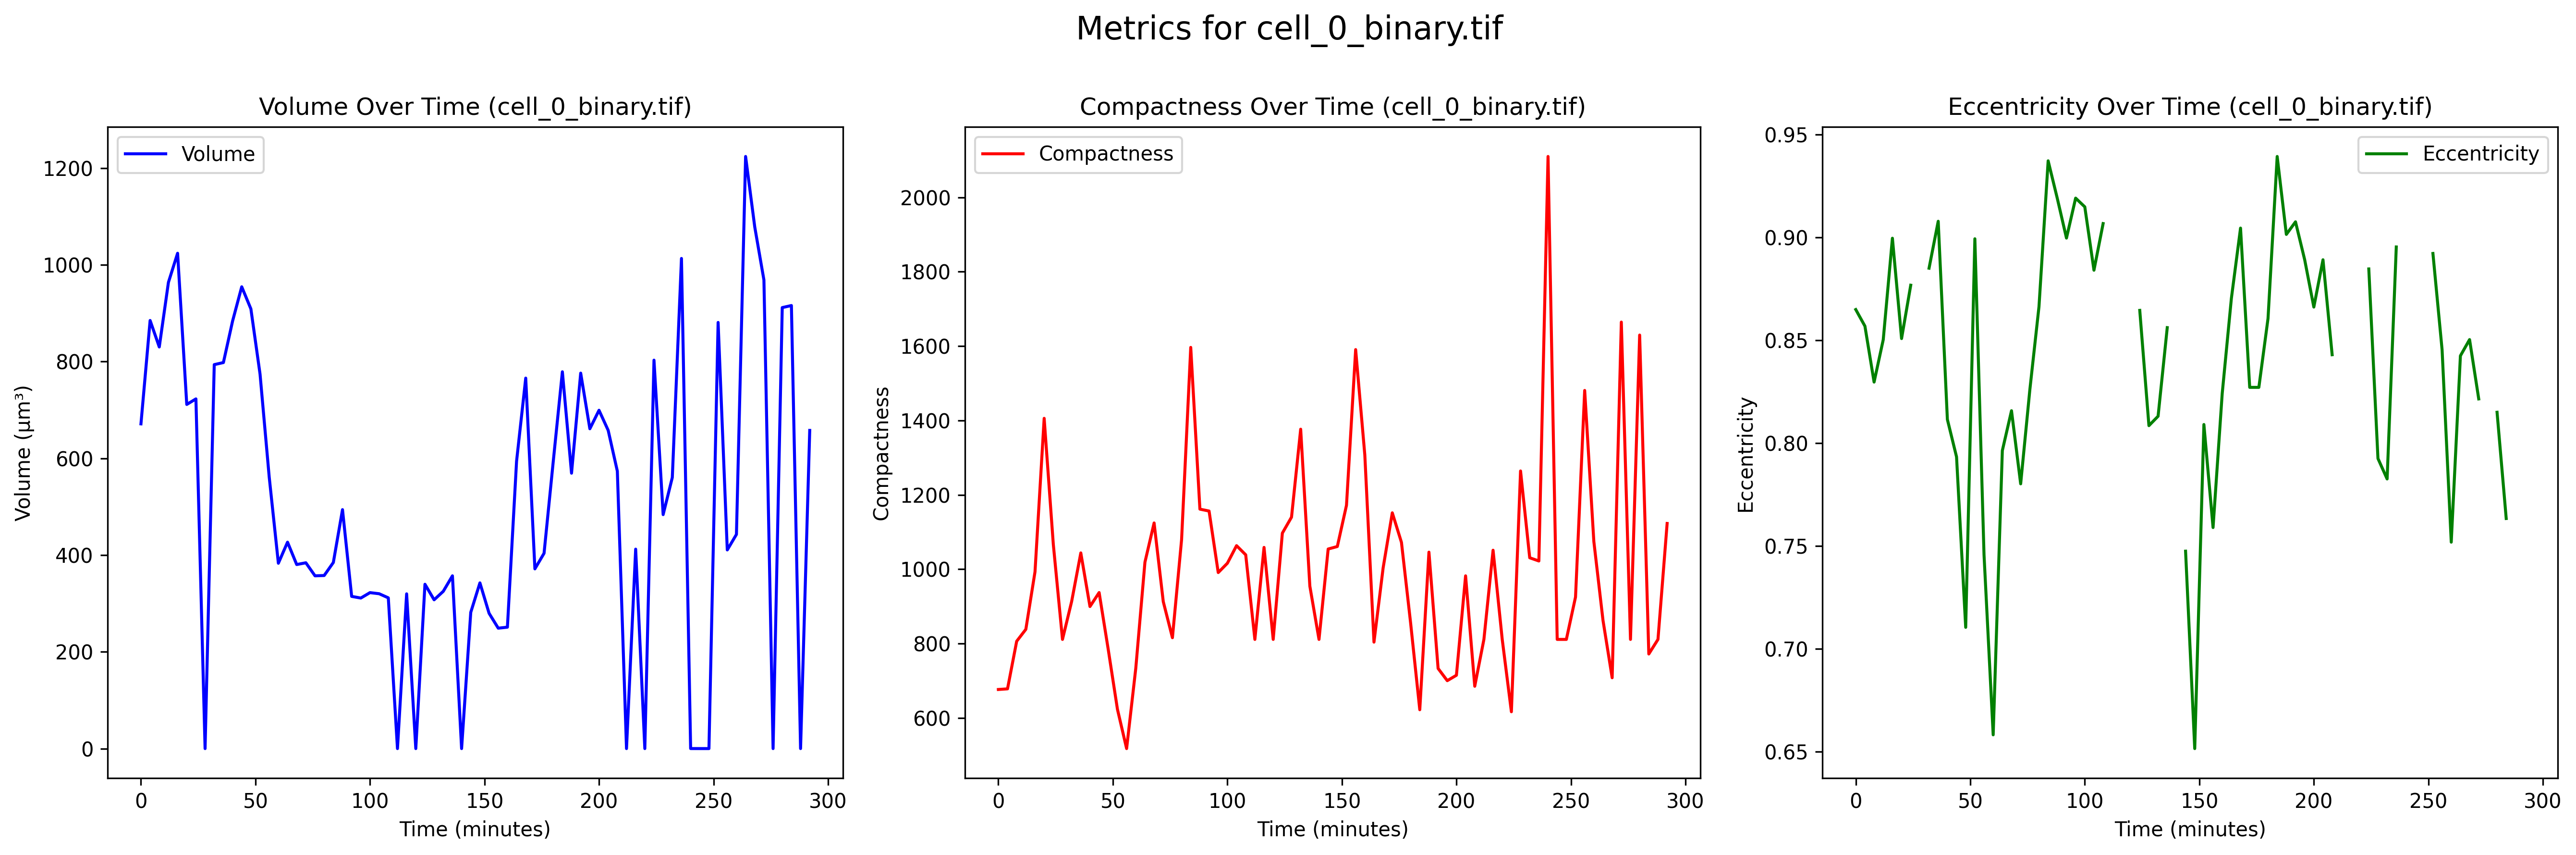

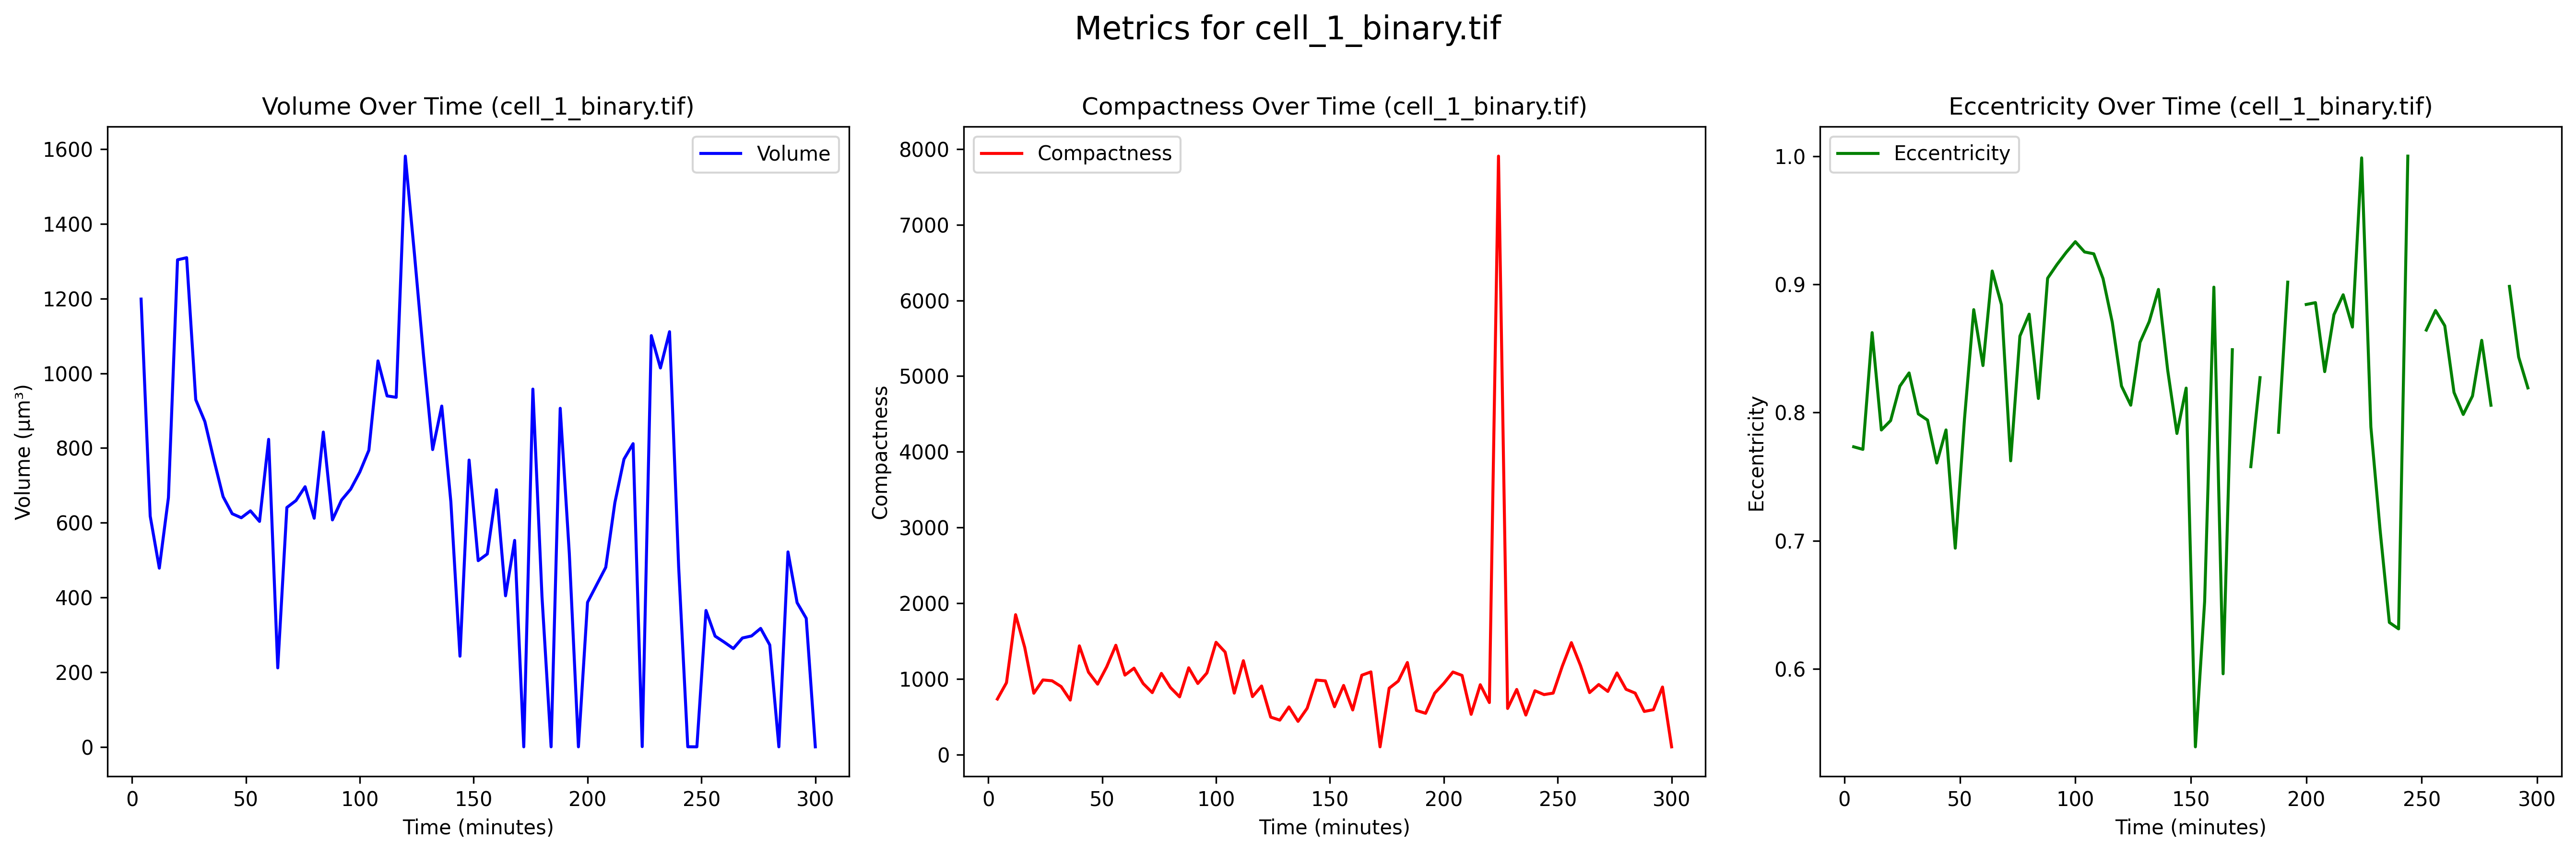

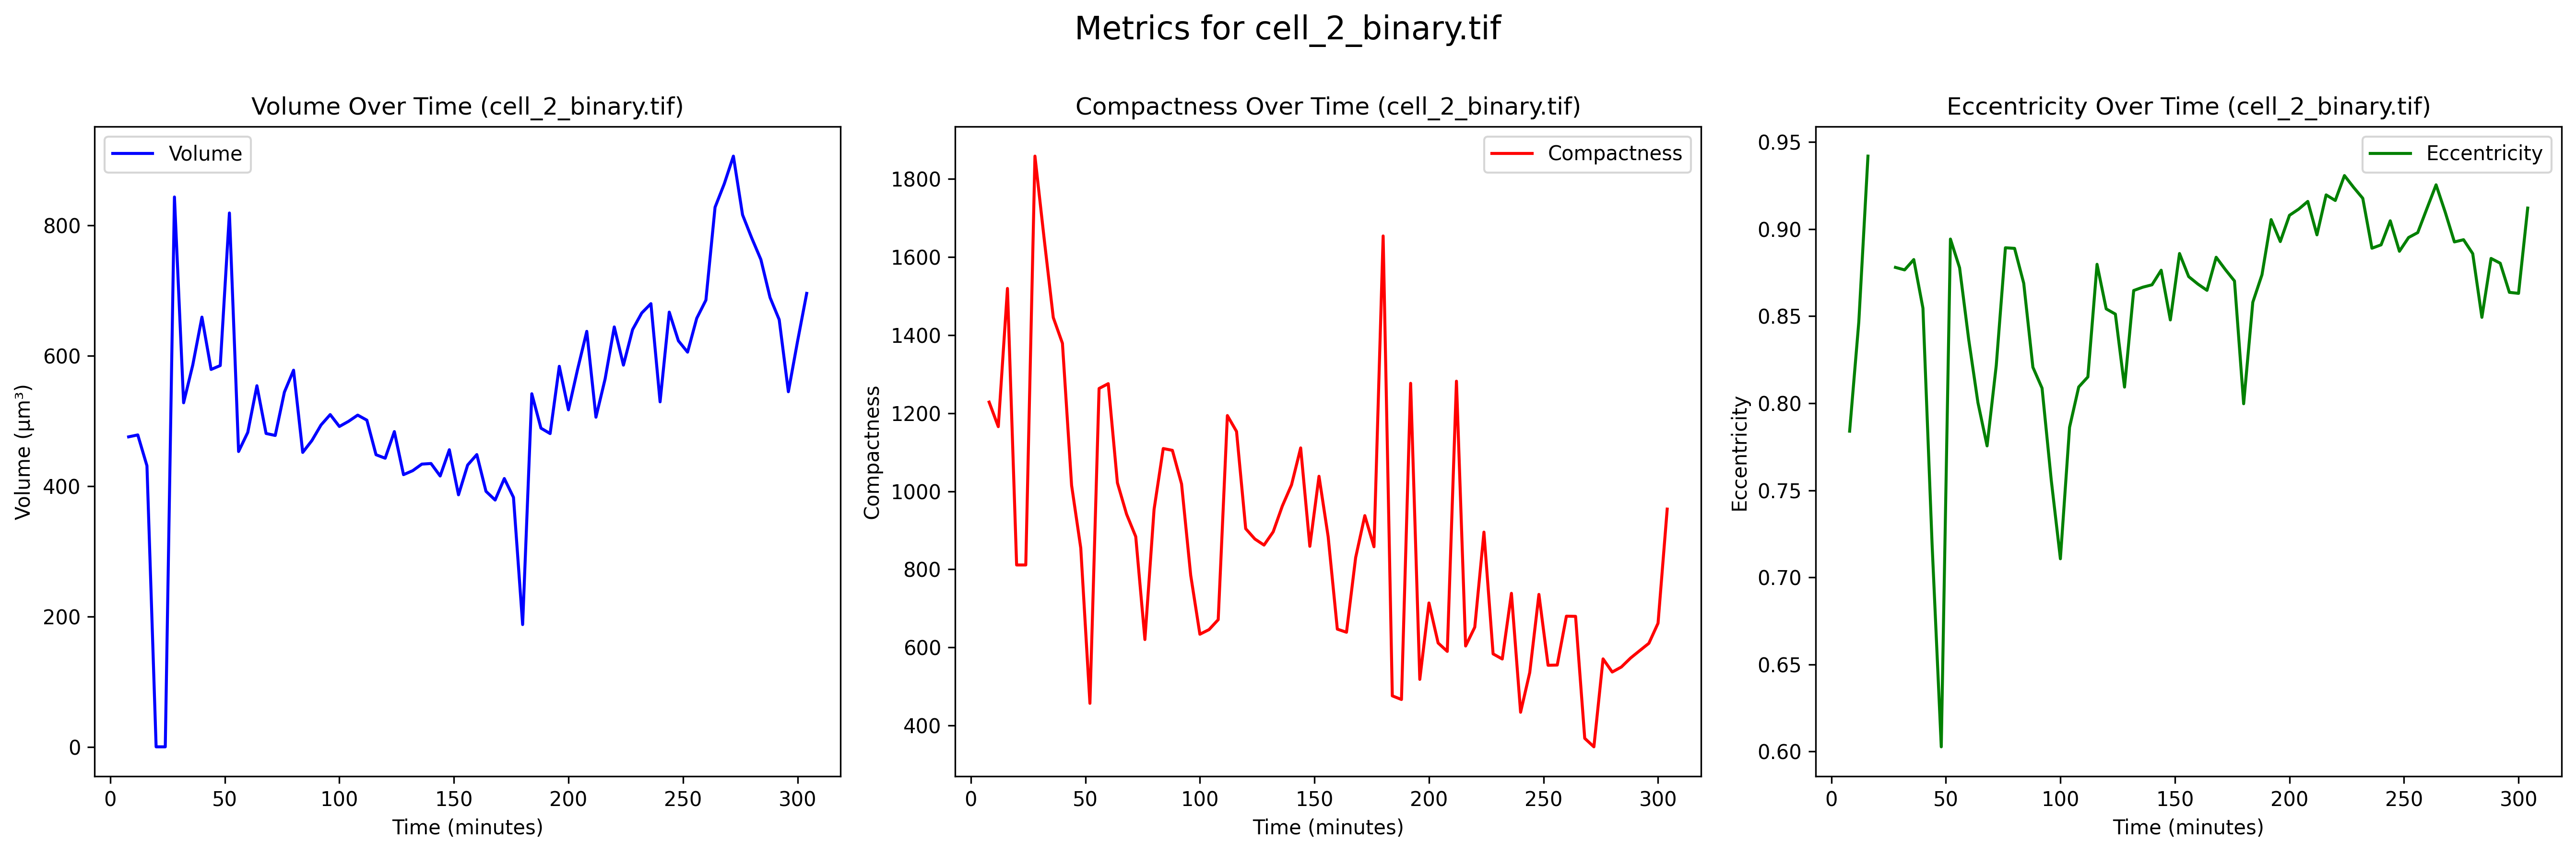

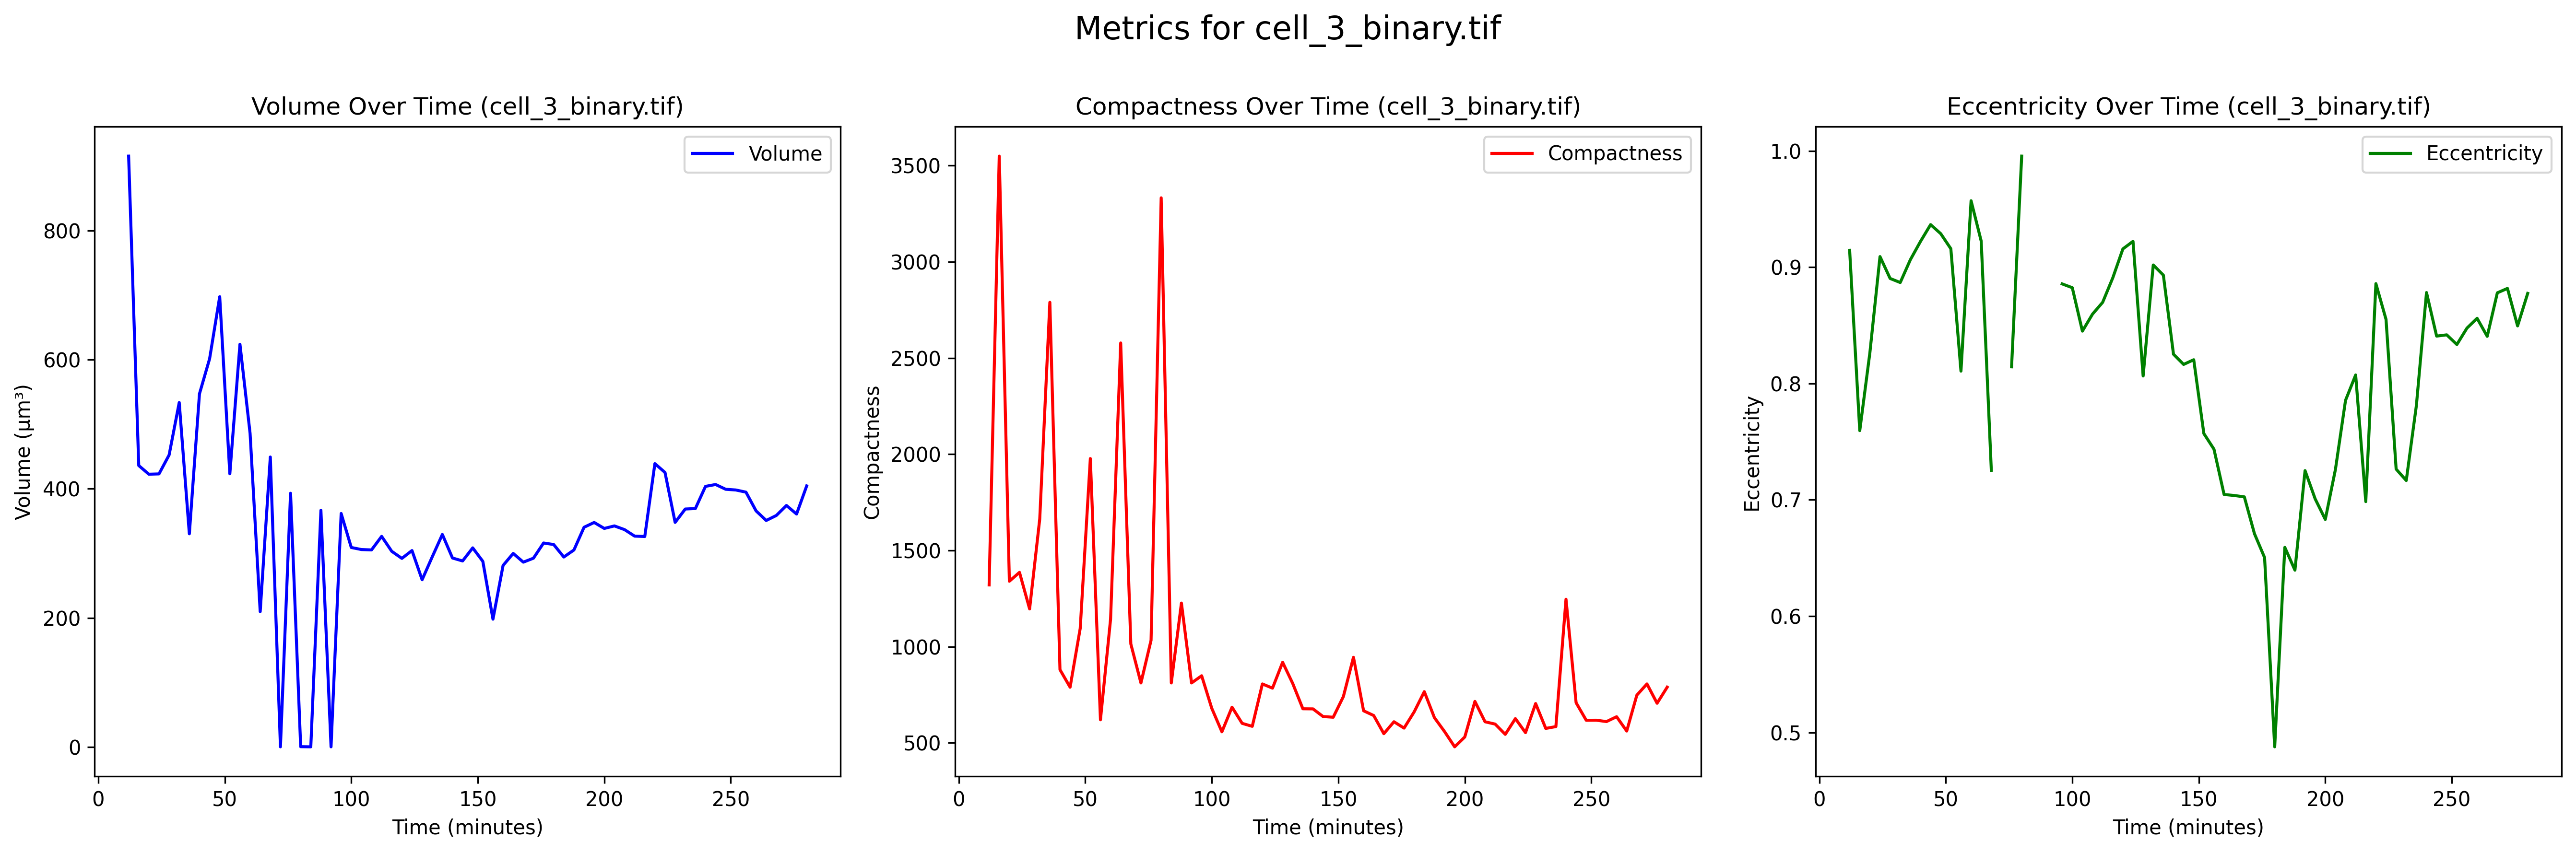

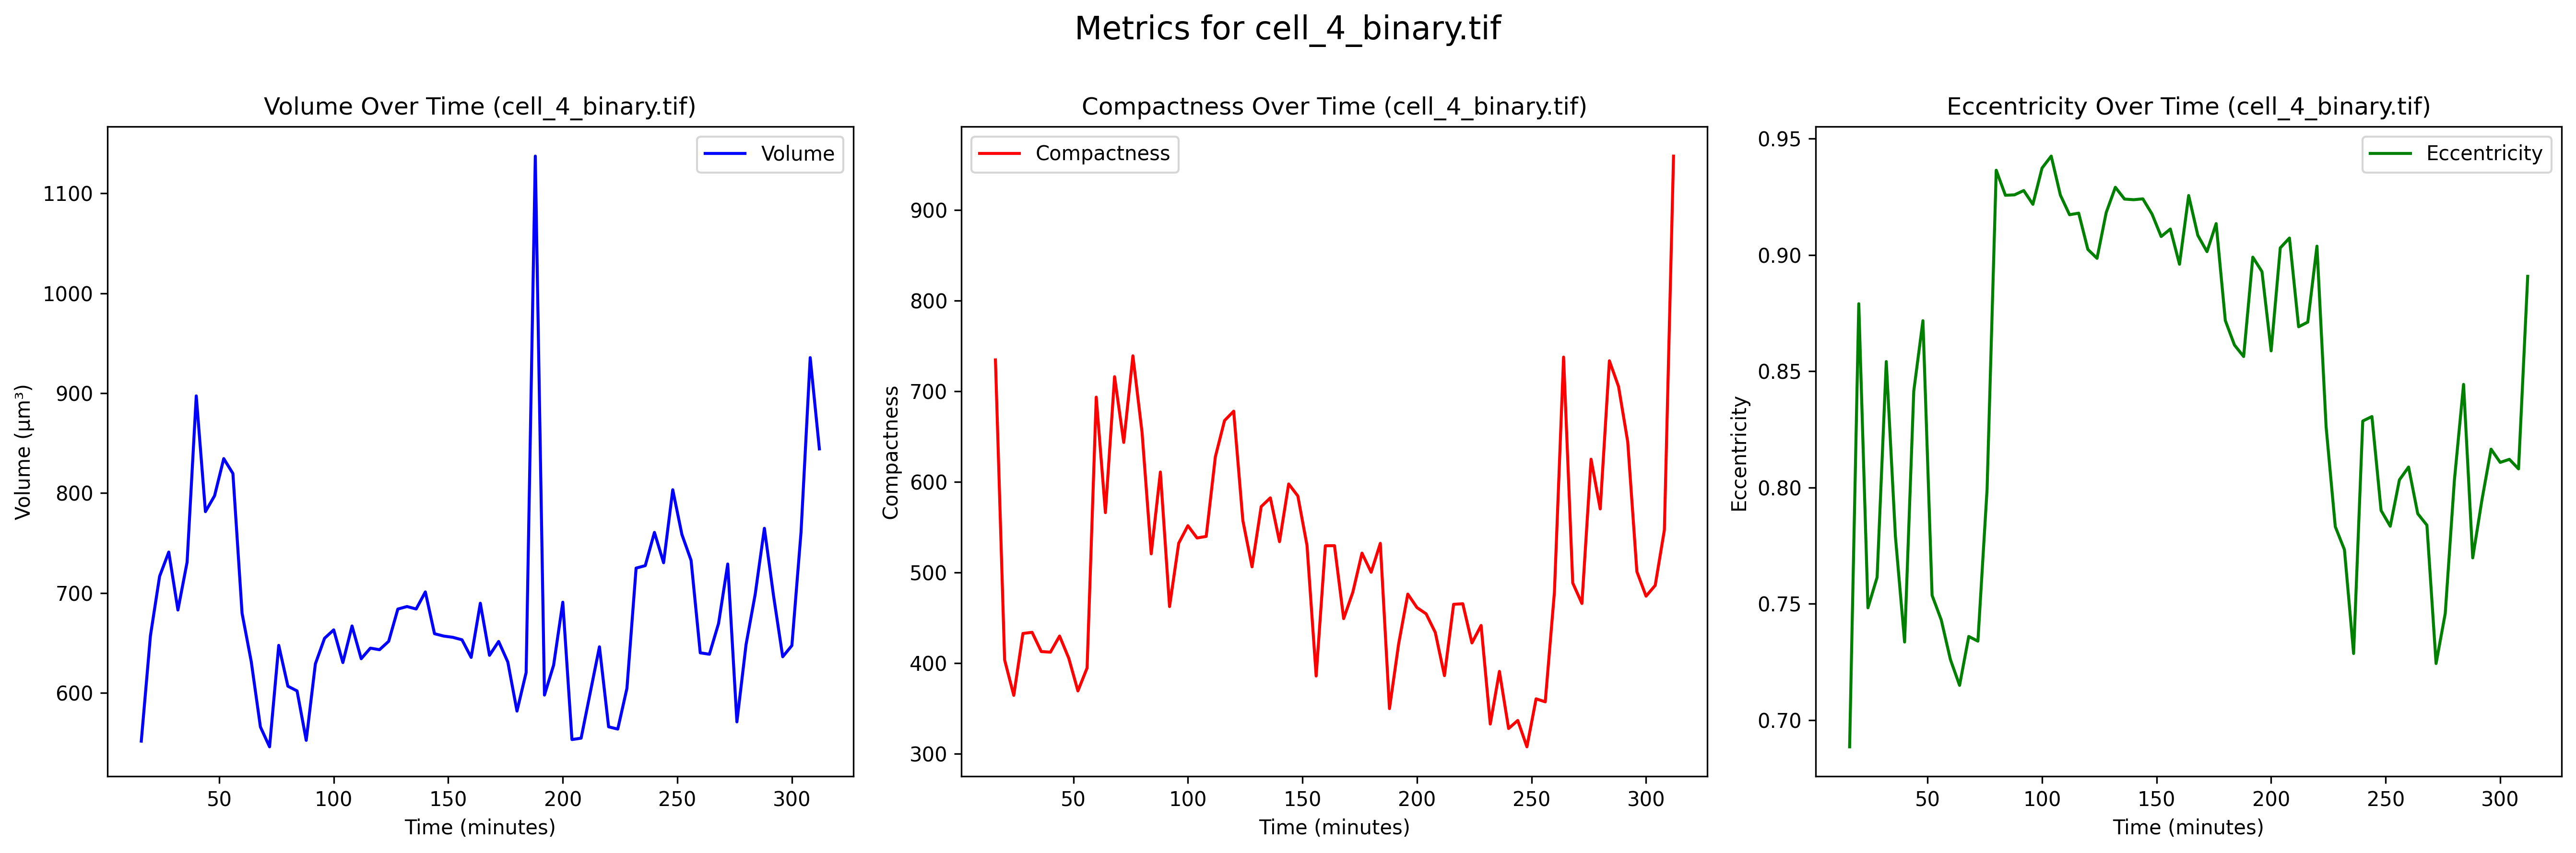

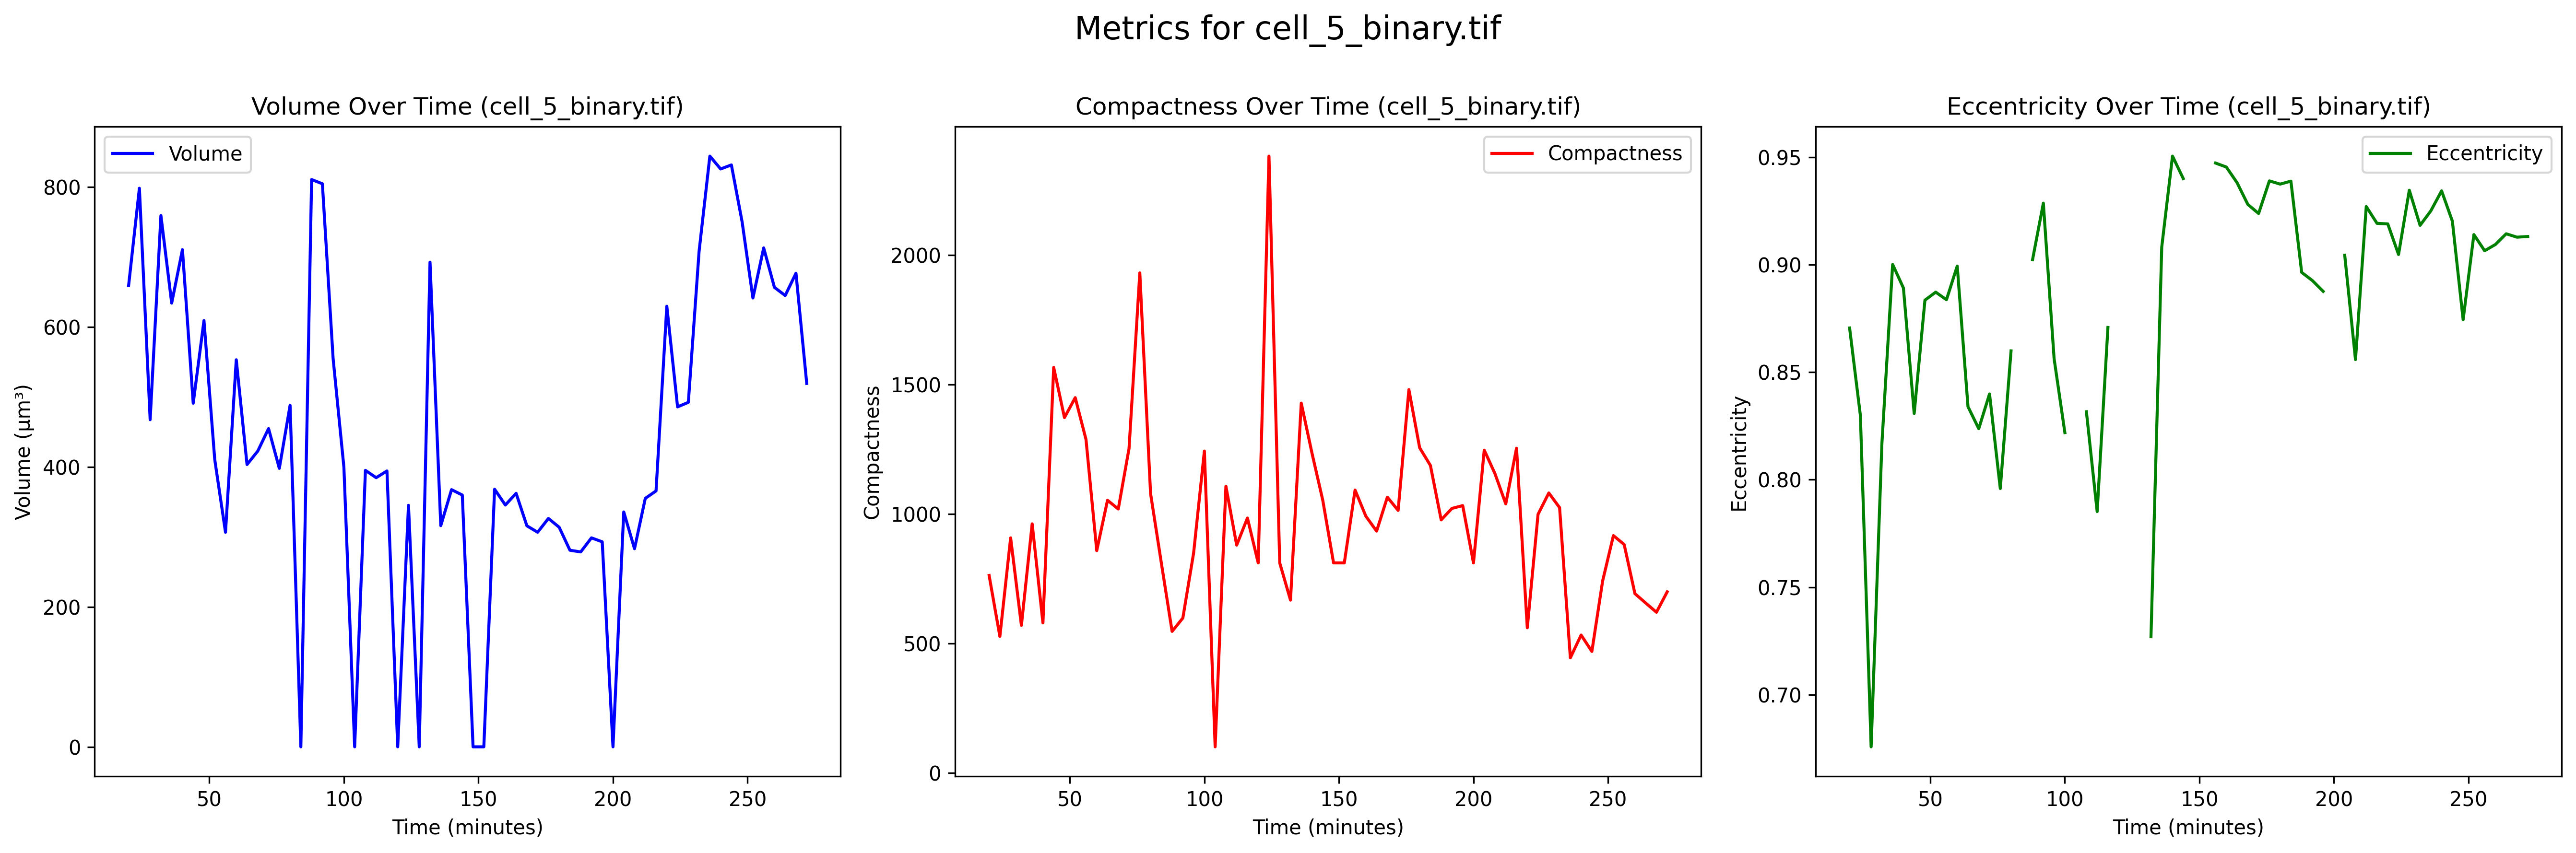

Metrics saved to H:/PROJECTS-03/Feyza/240925-NcadGFPxH2Bch-HIGHRES/20240925_151619_20240925_NcadxH2B_05z_timelapse/cropped-mastodon-roi/metrics.json


In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from skimage import io, measure
from skimage.measure import marching_cubes

# Function to calculate volume in cubic microns
def calculate_volume(region_mask, voxel_size):
    """Calculate the volume (in cubic microns) of a 3D region."""
    # Volume is the number of voxels times the voxel size (x_pixel * y_pixel * z_pixel)
    return np.sum(region_mask) * voxel_size[0] * voxel_size[1] * voxel_size[2]

# Function to calculate compactness
def calculate_compactness(region_mask, voxel_size):
    """
    Calculate the compactness of a 3D binary region.
    Compactness = Surface Area^3 / (36 * pi * Volume^2)
    """
    surface_area = calculate_surface_area(region_mask)
    volume = np.sum(region_mask) * voxel_size[0] * voxel_size[1] * voxel_size[2]
    if volume > 0:
        return (surface_area ** 3) / (36 * np.pi * (volume ** 2))
    return np.nan

def calculate_surface_area(binary_mask):
    """
    Compute the surface area of a 3D binary mask using Marching Cubes.
    """
    verts, faces, _, _ = marching_cubes(binary_mask, level=0)
    return measure.mesh_surface_area(verts, faces)

# Function to calculate eccentricity
def calculate_eccentricity(coords):
    """
    Calculate the eccentricity of a 3D region based on the eigenvalues of the covariance matrix.
    """
    if len(coords) < 3:
        return np.nan
    cov_matrix = np.cov(coords, rowvar=False)
    eigenvalues = np.linalg.eigvalsh(cov_matrix)
    if np.min(eigenvalues) <= 0:
        return np.nan
    return np.sqrt(1 - eigenvalues.min() / eigenvalues.max())

# Function to plot the metrics
def plot_metrics(volumes, compactnesses, eccentricities, time_points, file_name):
    if volumes and compactnesses and eccentricities:
        plt.figure(figsize=(18, 6))  # Set a larger figure size

        # Plot volume
        plt.subplot(1, 3, 1)
        plt.plot(time_points, volumes, label="Volume", color="blue")
        plt.xlabel("Time (minutes)")
        plt.ylabel("Volume (µm³)")  # Volume in cubic microns
        plt.title(f"Volume Over Time ({file_name})")
        plt.legend()

        # Plot compactness
        plt.subplot(1, 3, 2)
        plt.plot(time_points, compactnesses, label="Compactness", color="red")
        plt.xlabel("Time (minutes)")
        plt.ylabel("Compactness")
        plt.title(f"Compactness Over Time ({file_name})")
        plt.legend()

        # Plot eccentricity
        plt.subplot(1, 3, 3)
        plt.plot(time_points, eccentricities, label="Eccentricity", color="green")
        plt.xlabel("Time (minutes)")
        plt.ylabel("Eccentricity")
        plt.title(f"Eccentricity Over Time ({file_name})")
        plt.legend()

        plt.tight_layout()
        plt.suptitle(f"Metrics for {file_name}", fontsize=16)
        plt.subplots_adjust(top=0.85)  # Adjust title space

        # Show the plots
        plt.show()

# Main function to process a folder of images and compute metrics
def process_folder(folder_path, time_interval, voxel_size):
    metrics_dict = {}

    # Loop through all TIFF files in the folder
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif')])

    for t, file_name in enumerate(files):
        file_path = os.path.join(folder_path, file_name)
        mask = io.imread(file_path)

        # Check if the image is 4D (time series of 3D masks)
        if mask.ndim == 4:
            pass  # Proceed with processing
        else:
            continue  # Skip if it's not a 4D image

        if mask is None or np.sum(mask) == 0:
            continue  # Skip this image if it's empty

        # Initialize lists to store metrics for each timepoint
        volumes = []
        compactnesses = []
        eccentricities = []
        time_points = []  # To track the time points (in minutes)

        # Process each timepoint (3D binary mask) in the 4D image
        for time_idx in range(mask.shape[0]):  # Loop over the 4th dimension (time)
            current_timepoint_mask = mask[time_idx]

            # Label connected regions in the current timepoint
            labeled_mask = measure.label(current_timepoint_mask)
            props = measure.regionprops(labeled_mask)

            if len(props) == 0:
                continue  # Skip if no regions are found

            # There is only one region, so we can directly use it
            region_mask = (labeled_mask == 1)
            coords = props[0].coords

            # Compute metrics for this timepoint
            volumes.append(calculate_volume(region_mask, voxel_size))
            compactnesses.append(calculate_compactness(region_mask, voxel_size))
            eccentricities.append(calculate_eccentricity(coords))
            time_points.append(t * time_interval / 60 + time_idx * time_interval / 60)  # Convert to minutes

        # Save the metrics in the dictionary with the filename as the key
        if volumes and compactnesses and eccentricities:
            metrics_dict[file_name] = {
                "Time (minutes)": time_points,
                "Volume (µm³)": volumes,  # Volume in cubic microns
                "Compactness": compactnesses,
                "Eccentricity": eccentricities
            }

            # Plot the results for this file
            plot_metrics(volumes, compactnesses, eccentricities, time_points, file_name)

    # Save metrics to a JSON file
    save_metrics_to_json(folder_path, metrics_dict)

# Function to save metrics to a JSON file
def save_metrics_to_json(folder_path, metrics_dict):
    json_file_path = os.path.join(folder_path, "metrics.json")
    with open(json_file_path, 'w') as json_file:
        json.dump(metrics_dict, json_file, indent=4)
    print(f"Metrics saved to {json_file_path}")

# Example usage
folder_path = "H:/PROJECTS-03/Feyza/240925-NcadGFPxH2Bch-HIGHRES/20240925_151619_20240925_NcadxH2B_05z_timelapse/cropped-mastodon-roi/"
time_interval = float(input("Enter the time interval between frames in seconds: "))
x_pixel = float(input("Enter the pixel size in the x direction (in microns): "))
y_pixel = float(input("Enter the pixel size in the y direction (in microns): "))
z_pixel = float(input("Enter the pixel size in the z direction (in microns): "))

voxel_size = (x_pixel, y_pixel, z_pixel)  # Tuple for voxel size in microns

process_folder(folder_path, time_interval, voxel_size)
